# Get data of heart diase

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import joblib

# Lấy data và tiền xử lý

In [2]:
df = pd.read_csv("../datasets/heart_disease.csv")

df = df.drop(columns=['Fruits', 'Veggies', 'AnyHealthcare','NoDocbcCost',  'CholCheck', "Income", "Education"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   Diabetes              253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   HvyAlcoholConsump     253680 non-null  float64
 9   GenHlth               253680 non-null  float64
 10  MentHlth              253680 non-null  float64
 11  PhysHlth              253680 non-null  float64
 12  DiffWalk              253680 non-null  float64
 13  Sex                   253680 non-null  float64
 14  Age                   253680 non-null  float64
dtype

# Navie Bayes

In [3]:
# 🎯 Tách input và output
X = df.drop('HeartDiseaseorAttack', axis=1)
for x in X.columns:
    X[x]= X[x].astype(int)
y = df['HeartDiseaseorAttack']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

nb_model = GaussianNB() 
nb_model.fit(X_train, y_train)
joblib.dump(nb_model, 'naive_bayes_model.pkl')


['naive_bayes_model.pkl']

Accuracy: 0.7113489435509303
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82     45968
         1.0       0.21      0.75      0.33      4768

    accuracy                           0.71     50736
   macro avg       0.59      0.73      0.57     50736
weighted avg       0.89      0.71      0.77     50736



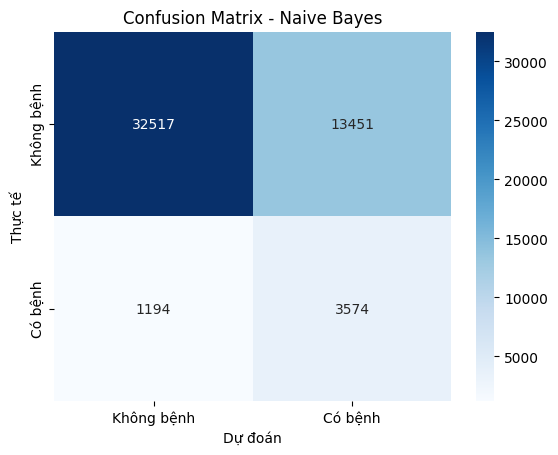

In [4]:
# Dự đoán
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()